In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import deque

In [2]:
#Graph
graph = {}
graph['NYC'] = {}
graph['NYC']['DC'] = 2
graph['NYC']['Indianapolis']= 11
graph['NYC']['Pittsburg'] = 7

graph['DC']= {}
graph['DC']['Atlanta'] = 2
graph['Atlanta']= {}
graph['Atlanta']['New Orleans'] = 2
graph['New Orleans'] = {}
graph['New Orleans']['Dallas']= 2
graph['Dallas'] = {}
graph['Dallas']['Albuquerque'] = 2

graph['Indianapolis'] = {}
graph['Indianapolis']['Kansas City'] = 8
graph['Kansas City'] = {}
graph['Kansas City']['Denver'] = 7
graph['Denver'] = {}
graph['Denver']['Salt Lake City'] = 6

graph['Pittsburg'] = {}
graph['Pittsburg']['Cincinatti'] = 6
graph['Cincinatti'] = {}
graph['Cincinatti']['St Louis'] = 8
graph['St Louis'] = {}
graph['St Louis']['Oklahoma City'] = 7
graph['Oklahoma City'] = {}
graph['Oklahoma City']['Albuquerque'] = 9

graph['Salt Lake City'] = {}
graph['Salt Lake City']['Las Vegas']= 9
graph['Las Vegas'] = {}
graph['Las Vegas']['Los Angeles'] = 5
graph['Las Vegas']['San Diego'] = 2
graph['San Diego'] = {}
graph ['San Diego']['Los Angeles'] = 2

graph['Albuquerque'] = {}
graph['Albuquerque']['Phoenix'] = 2
graph['Phoenix'] = {}
graph['Phoenix']['Las Vegas'] = 2
graph['Phoenix']['San Diego'] = 5
graph['Los Angeles'] = {}


In [3]:
print(graph)

{'NYC': {'DC': 2, 'Indianapolis': 11, 'Pittsburg': 7}, 'DC': {'Atlanta': 2}, 'Atlanta': {'New Orleans': 2}, 'New Orleans': {'Dallas': 2}, 'Dallas': {'Albuquerque': 2}, 'Indianapolis': {'Kansas City': 8}, 'Kansas City': {'Denver': 7}, 'Denver': {'Salt Lake City': 6}, 'Pittsburg': {'Cincinatti': 6}, 'Cincinatti': {'St Louis': 8}, 'St Louis': {'Oklahoma City': 7}, 'Oklahoma City': {'Albuquerque': 9}, 'Salt Lake City': {'Las Vegas': 9}, 'Las Vegas': {'Los Angeles': 5, 'San Diego': 2}, 'San Diego': {'Los Angeles': 2}, 'Albuquerque': {'Phoenix': 2}, 'Phoenix': {'Las Vegas': 2, 'San Diego': 5}, 'Los Angeles': {}}


In [4]:
#Costs
costs = {}
costs['DC'] = 2
costs['Atlanta'] = float('inf')
costs['New Orleans'] = float('inf')
costs['Dallas'] = float('inf')
costs['Indianapolis'] = 11
costs['Kansas City'] = float('inf')
costs['Denver'] = float('inf')
costs['Salt Lake City'] = float('inf')
costs['Pittsburg'] = 7
costs['Cincinatti'] = float('inf')
costs['St Louis'] = float('inf')
costs['Oklahoma City'] = float('inf')
costs['Albuquerque'] = float('inf')
costs['Phoenix'] = float('inf')
costs['Las Vegas'] = float('inf')
costs['San Diego'] = float('inf')
costs['Los Angeles'] = float('inf')


In [5]:
#Parent for finding path later
parent = {}
parent['NYC'] = None
parent['DC'] = 'NYC'
parent['Indianapolis'] = 'NYC'
parent['Pittsburg'] = 'NYC'
parent['Atlanta'] = None
parent['New Orleans'] = None
parent['Dallas'] = None
parent['Kansas City'] = None
parent['Denver'] = None
parent['Salt Lake City'] = None
parent['Cincinatti'] = None
parent['St Louis'] = None
parent['Oklahoma City'] = None
parent['Albuquerque'] = None
parent['Phoenix'] = None
parent['Las Vegas'] = None
parent['San Diego'] = None
parent['Los Angeles'] = None


# Breadth-First 

In [6]:
def returnShortestPath(graph, start, end):
    queue = [(start,[start])]
    searched = set()
    while queue:
        city, path = queue.pop(0)
        searched.add(city)
        for node in graph[city]:
            if node == end:
                return path + [end]
            else:
                if node not in searched:
                    searched.add(node)
                    queue.append((node, path + [node]))

In [7]:
#Find Shortest Path
start_time = time.time()
for x in range(100):
    shortest_path = returnShortestPath(graph, 'NYC', 'Los Angeles')
breadth_runtime = (time.time()-start_time)*1000
print(shortest_path)

['NYC', 'Indianapolis', 'Kansas City', 'Denver', 'Salt Lake City', 'Las Vegas', 'Los Angeles']


In [8]:
#Get total cost of shortest path
total = 0
for x in shortest_path:
    try:
        next_path = shortest_path[shortest_path.index(x)+1]
        total += graph[x][next_path]
    except: pass
print(total)    

46


# Dijkstra's Algorithm

In [9]:
def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    for node in costs:
        cost = costs[node]
        if cost < lowest_cost and node not in processed:
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

In [10]:
#Get Cost
processed = []
start_time = time.time()
node = find_lowest_cost_node(costs)
while node is not None:
    cost = costs[node]
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        if costs[n] > new_cost:
            costs[n] = new_cost
            parent[n] = node
    processed.append(node)
    node = find_lowest_cost_node(costs)
d_runtime = (time.time()-start_time)*1000
print("Cost from NYC to LA:")
print(costs['Los Angeles'])

Cost from NYC to LA:
18


In [11]:
#Get Path
def GetPath(endcity):
    path = []
    path.append(endcity)
    city = parent[endcity]
    while city is not None:
        path.append(city)
        city = parent[city]
    return path[::-1]

In [12]:
print(GetPath('Los Angeles'))

['NYC', 'DC', 'Atlanta', 'New Orleans', 'Dallas', 'Albuquerque', 'Phoenix', 'Las Vegas', 'San Diego', 'Los Angeles']


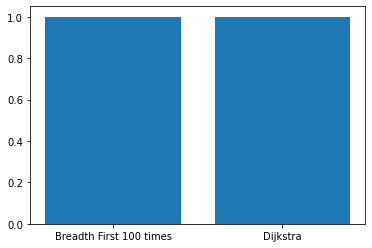

In [17]:
x = ['Breadth First 100 times', 'Dijkstra']
y = [breadth_runtime, d_runtime]
plt.bar(x,y);

# Executive Summary:

## During this experiment, I created a graph based on multiple cities and routes that can be taken during a road trip from New York to Los Angeles. Each city was a node whereas the time that it took to get to each city was an edge. During this experiment two different approaches were taken. The first was the breadth-first algorithm approach where the idea was to travel to the least amount of nodes possible. The second was using Dijkstra's algorithm to find the route with the least amount of edge cost possible.

## Regarding the results of the algorithms where there extremely distinct differences. The breadth-first approach took the user to 7 different cities (when counting the start and ending ones) at a cost of 46. Dijkstra's algorithm took the user to 10 different cities at a cost of 18. That cost is less than half of the previous cost, meaning that the journey from NYC to Los Angeles is significantly faster in comparison. These results come about for obvious reasons, Dijkstra is more interested in cost while breadth-first is more interested in nodes. Regarding the complexity of said algorithm, Dijkstra's is far more complex since the algorithm requires more inputs and the fact that it must continuously backtrack to compare costs from one path to another.

## A lot of that computational complexity shows on the above bar graph. To even record times in milliseconds for breadth-first, I had to run the algorithm 100 times. For Dijkstra, I only had to run it once to get a solid time. It's quite striking that I had to run breadth-first 100 times to get a time similar to running Dijkstra's once. This does make sense since the number of edges has a strong influence on Dijkstra's Big O notation. In the case of breadth-first, it is O(V+E) while for Dijkstra it is O(E(logV)). Therefore, there is more of a constant with breadth-first than with Dijkstra regarding how it runs. This is all helpful for data engineers for a couple reasons: 1. It helps them understand that while breadth-first may help them find the shortest path, it will not necessarily help them with the most optimal path. 2. It helps them understand that while Dijkstra's algorithm may find the most optimal path, it does it at a larger computational cost than the breadth-first algorithm. 